# Wstęp do multimediów (WMM)
# Laboratorium #1: Analiza częstotliwościowa sygnałów czasu dyskretnego

Autorzy:

**Kamil Jaworski** z grupy `101`

**Paweł Skowron** z grupy `106`

In [1]:
%pip install numpy matplotlib


Note: you may need to restart the kernel to use updated packages.



## Zadanie 1:
Liczba próbek (w jednym okresie) sygnału rzeczywistego $ s(t) = \sin(2\pi t) $ wynosi $ N $, gdzie $ N $ jest potęgą 2.

**a)** Przyjmując $ N = 8 $, wykreślić przebieg sygnału s(t) próbkowanego, widmo amplitudowe i fazowe oraz zweryfikować eksperymentalnie słuszność twierdzenia Parsevala.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

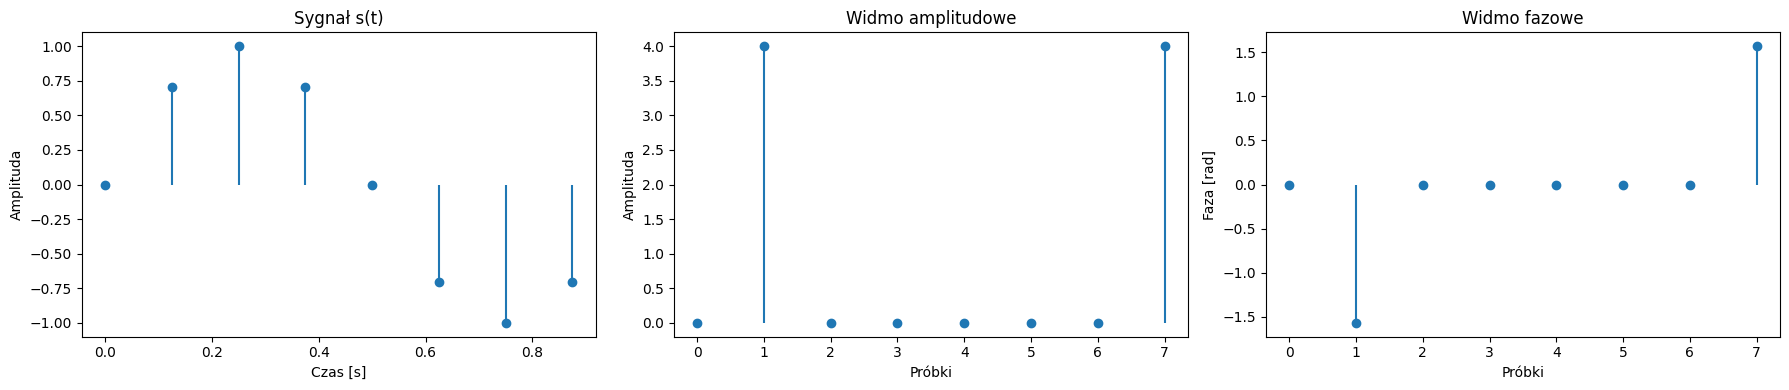

Twierdzenie Parsevala jest prawdziwe


In [2]:
# Definicja liczby próbek
N = 8

# Tworzenie próbek dla jednego okresu
t = np.linspace(0, 1, N, endpoint=False)

# Sygnał s(t)
s = np.sin(2 * np.pi * t)

# Obliczenie szybkiej transformaty Fouriera (FFT)
S = np.fft.fft(s)

# Widmo amplitudowe
amplitude_spectrum = np.abs(S)

# Obliczanie widma fazowego z uwzględnieniem korekty na numeryczne zera
epsilon = 1e-10  # wartość progowa dla amplitudy
phase_spectrum = np.angle(S)
for i in range(N):
    if amplitude_spectrum[i] < epsilon:
        phase_spectrum[i] = 0
    else:
        # Dla sygnału sinusoidalnego faza powinna wynosić -pi/2 lub pi/2 dla głównych składników
        if i != 0 and i != N//2:  # Pomijamy składnik stały i Nyquista
            phase_spectrum[i] = np.pi/2 * np.sign(np.imag(S[i]))

# Sprawdzenie twierdzenia Parsevala
parseval_theorem = np.allclose(np.sum(s**2), np.sum(amplitude_spectrum**2) / N)

# Wykres sygnału s(t)
plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 1)
plt.stem(t, s, basefmt=" ")
plt.title('Sygnał s(t)')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')

# Wykres widma amplitudowego
plt.subplot(1, 3, 2)
plt.stem(range(N), amplitude_spectrum, basefmt=" ")
plt.title('Widmo amplitudowe')
plt.xlabel('Próbki')
plt.ylabel('Amplituda')

# Wykres widma fazowego
plt.subplot(1, 3, 3)
plt.stem(range(N), phase_spectrum, basefmt=" ")
plt.title('Widmo fazowe')
plt.xlabel('Próbki')
plt.ylabel('Faza [rad]')

# Wyświetlenie wykresów
plt.tight_layout()
plt.show()

print(f"Twierdzenie Parsevala jest {'prawdziwe' if parseval_theorem else 'fałszywe'}")




**b)** Wykreślić wykres przedstawiający czas wyznaczania widma sygnału dyskretnego za pomocą algorytmu FFT w funkcji liczby próbek $ N = 2^l $, gdzie $ l \in \{3, 4, 5, 6, 7, 8, 9, 10, 11, 12\} $. Skomentować kształt otrzymanego wykresu odnosząc się do teoretycznej złożoności obliczeniowej algorytmu FFT.


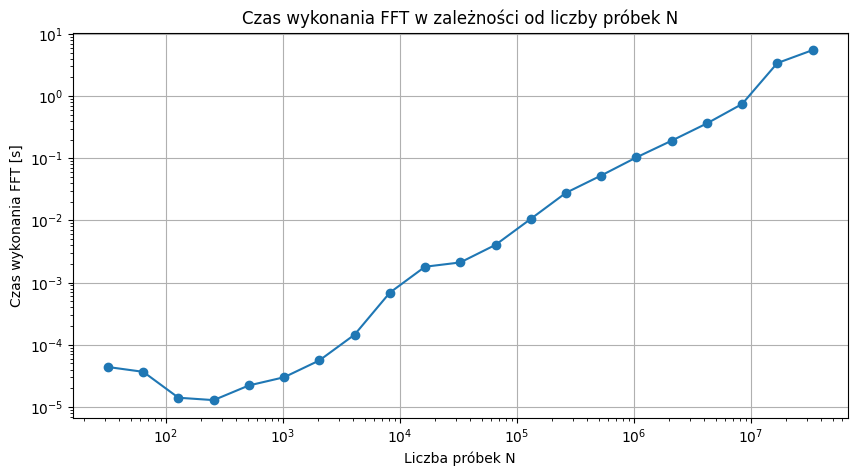

Czas FFT dla N=32: 0.000044 sekund
Czas FFT dla N=64: 0.000037 sekund
Czas FFT dla N=128: 0.000014 sekund
Czas FFT dla N=256: 0.000013 sekund
Czas FFT dla N=512: 0.000022 sekund
Czas FFT dla N=1024: 0.000030 sekund
Czas FFT dla N=2048: 0.000056 sekund
Czas FFT dla N=4096: 0.000145 sekund
Czas FFT dla N=8192: 0.000689 sekund
Czas FFT dla N=16384: 0.001799 sekund
Czas FFT dla N=32768: 0.002110 sekund
Czas FFT dla N=65536: 0.004044 sekund
Czas FFT dla N=131072: 0.010561 sekund
Czas FFT dla N=262144: 0.027790 sekund
Czas FFT dla N=524288: 0.052758 sekund
Czas FFT dla N=1048576: 0.103193 sekund
Czas FFT dla N=2097152: 0.191574 sekund
Czas FFT dla N=4194304: 0.363044 sekund
Czas FFT dla N=8388608: 0.744789 sekund
Czas FFT dla N=16777216: 3.394485 sekund
Czas FFT dla N=33554432: 5.482217 sekund


In [3]:
# Zakres potęg dla N
exponents = range(5, 26)
# Listy dla przechowywania wartości N i czasów wykonania FFT
N_values = []
fft_times = []

# Pomiar czasu wykonania FFT dla różnych wartości N
for exponent in exponents:
    N = 2**exponent
    N_values.append(N)
    t = np.linspace(0, 1, N, endpoint=False)
    s = np.sin(2 * np.pi * t)
    start_time = time.time()
    S = np.fft.fft(s)
    fft_times.append(time.time() - start_time)

# Wykres czasu wykonania FFT w zależności od liczby próbek N
plt.figure(figsize=(10, 5))
plt.plot(N_values, fft_times, marker='o')
plt.title('Czas wykonania FFT w zależności od liczby próbek N')
plt.xlabel('Liczba próbek N')
plt.ylabel('Czas wykonania FFT [s]')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

# Wypisanie czasów wykonania FFT
for N, fft_time in zip(N_values, fft_times):
    print(f"Czas FFT dla N={N}: {fft_time:.6f} sekund")


Wykres przedstawia zależność czasu wykonywania szybkiej transformaty Fouriera (FFT) od liczby próbek $N$. Liczba próbek na wykresie jest przedstawiona w skali logarytmicznej, podobnie jak czas wykonania FFT.

Zgodnie z teoretyczną złożonością obliczeniową algorytmu FFT, która wynosi $O(n\log(n))$, oczekujemy, że czas potrzebny na przeprowadzenie transformacji będzie wzrastał liniowo względem logarytmu liczby próbek $N$. Wykres pokazuje, że zależność ta jest zachowana – na logarytmicznej skali czas wykonania FFT rośnie niemalże liniowo wraz ze wzrostem liczby próbek, co pokrywa się z oczekiwaniami.

Warto również wspomnieć, że pomiar czasu dla większego zakresu $N$ pozwala lepiej zobaczyć trend zwiększającego się czasu obliczeń dla rosnących potęg $N$, co umożliwia lepszą weryfikację teoretycznej złożoności algorytmu FFT w praktyce.

Podsumowując, otrzymany wykres potwierdza teoretyczną złożoność obliczeniową algorytmu FFT i pokazuje, że w praktycznych zastosowaniach szybkość obliczeń FFT rośnie logarytmicznie wraz ze wzrostem liczby próbek.

Zakres wartości $ N $ został rozszerzony ponad zalecany w zadaniu, aby lepiej zweryfikować zgodność empirycznych czasów obliczeń z teoretyczną złożonością algorytmu FFT. Rozszerzenie to umożliwiło dokładniejszą analizę i potwierdzenie oczekiwanego wzorca wzrostu czasu wykonania w zależności od liczby próbek.



## Zadanie 2:
Badać wpływ przesunięcia w czasie na postać widma amplitudowego i widma fazowego dyskretnego sygnału harmoniczengo $ s[n] = A \sin\left(\frac{2\pi n}{N}\right) $ o amplitudzie $ A = 2 $ i okresie podstawowym $ N = 88 $.

W tym celu dla każdej wartości $ n_0 \in \left\{0, \frac{N}{4}, \frac{N}{2}, \frac{3N}{4}\right\} $ wykreślić widmo amplitudowe i fazowe przesuniętego sygnału $ s[n - n_0]_N $. Skomentować otrzymane wyniki.




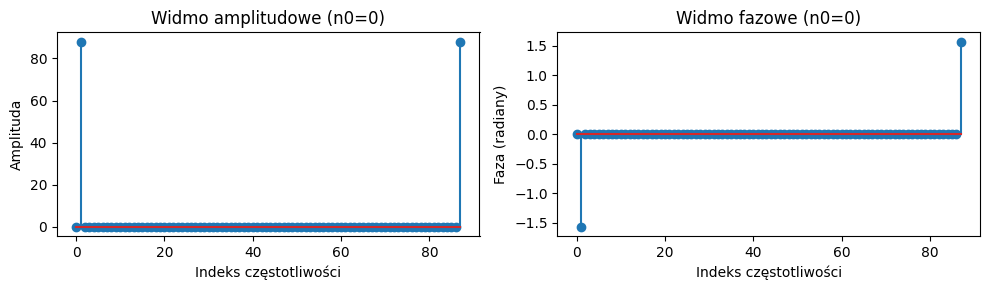

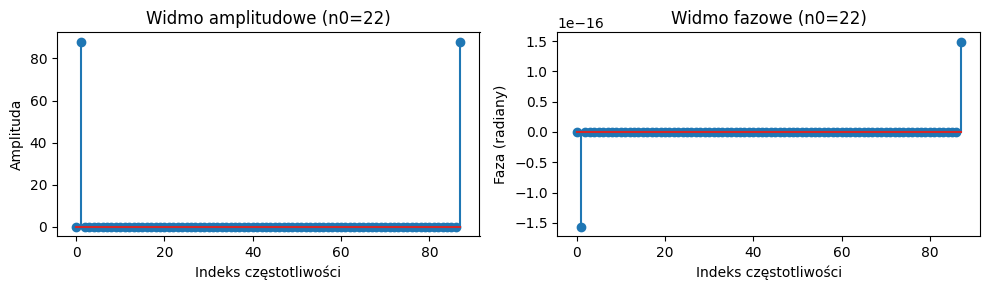

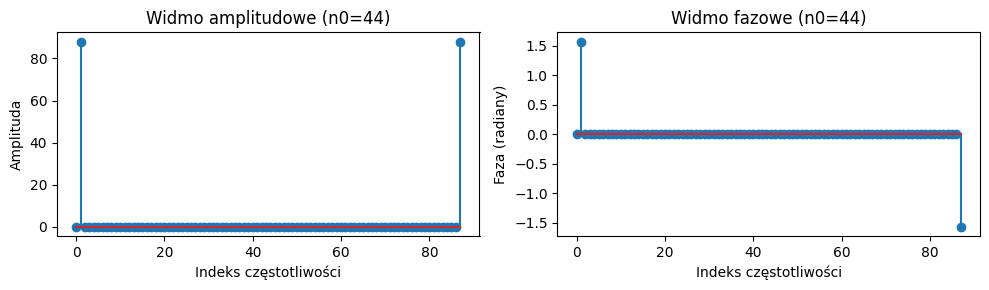

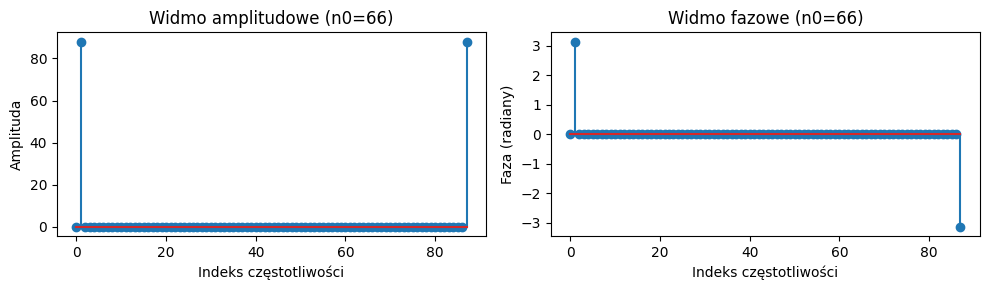

In [5]:
# Wartości n0
n0_values = [0, N//4, N//2, 3*N//4]

# Mała wartość epsilon
epsilon = 1e-10

# Wykresy widma amplitudowego i fazowego
for n0 in n0_values:
    # Przesunięcie czasowe sygnału
    shifted_s = np.roll(s, -n0)

    # Widmo amplitudowe i fazowe
    fft_shifted_s = np.fft.fft(shifted_s)
    amplitude_spectrum = np.abs(fft_shifted_s)

    # Poprawienie widma fazowego
    phase_spectrum = np.angle(fft_shifted_s)
    phase_spectrum[np.abs(fft_shifted_s) < epsilon] = 0  # Warunek na zerowanie się części urojonej

    # Wykres widma amplitudowego
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 2, 1)
    plt.stem(amplitude_spectrum)
    plt.title(f"Widmo amplitudowe (n0={n0})")
    plt.xlabel("Indeks częstotliwości")
    plt.ylabel("Amplituda")

    # Wykres widma fazowego
    plt.subplot(1, 2, 2)
    plt.stem(phase_spectrum)
    plt.title(f"Widmo fazowe (n0={n0})")
    plt.xlabel("Indeks częstotliwości")
    plt.ylabel("Faza (radiany)")

    plt.tight_layout()
    plt.show()


 - Widmo amplitudowe jest niezmienne względem przesunięcia czasowego, co jest oczekiwane dla sygnału harmonijnego. Amplituda prążków pozostaje stała, pokazując charakterystyczne składowe częstotliwości sygnału.

- Widmo fazowe sygnału dyskretnego po przesunięciu czasowym ukazuje, jak przesunięcie w domenie czasu wpływa na fazę poszczególnych składowych częstotliwościowych w domenie częstotliwości. Każde z przesunięć czasowych n0n0​ zmienia fazę sygnału w sposób przewidywalny:

  - Dla $ n_0 = 0 $, sygnał nie jest przesunięty, więc widmo fazowe ma wartości bliskie zeru, co oznacza, że sinusoida zaczyna się od punktu zero fazy.
  - Dla $ n_0 = \frac{N}{4} $, widmo fazowe pokazuje przesunięcie fazowe o $ \frac{\pi}{2} $ radianów, co odpowiada przesunięciu sinusa o ćwierć jego okresu.
  - Dla $ n_0 = \frac{N}{2} $, przesunięcie fazowe wynosi $ \pi $ radianów, co oznacza przesunięcie sinusa o połowę okresu, czyli zmianę znaku sinusa na przeciwny.
  - Dla $ n_0 = \frac{3N}{4} $, przesunięcie fazowe to $ \frac{3\pi}{2} $ radianów, co odpowiada przesunięciu sinusa o trzy czwarte okresu.

Wyniki są zgodne z oczekiwaniami teoretycznymi dla przesunięcia czasowego sygnałów sinusoidalnych. Faza reaguje liniowo na przesunięcie w czasie, natomiast amplituda pozostaje niezmienna. Zastosowanie małej wartości epsilon pomaga unikać błędów numerycznych w obliczeniach fazowych dla częstotliwości o znikomej amplitudzie.

## Zadanie 3:
Zbadać wpływ dopełnienia zerami na postać widma amplitudowego i widma fazowego dyskretnego sygnału $ s[n] = A \left(1 - \frac{n \mod N}{N}\right) $ o amplitudzie $ A = 4 $ i okresie podstawowym $ N = 12 $. W tym celu dla każdej wartości $ N_0 \in \{0, 1N, 4N, 9N\} $ wykreślić widmo amplitudowe i fazowe sygnału $ s[n] $ dopełnionego $ N_0 $ zerami. Skomentować otrzymane wyniki.

<ipython-input-6-5a91a017acb9>:31: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axs[i, 0].stem(amplitude_spectrum, use_line_collection=True)
<ipython-input-6-5a91a017acb9>:37: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axs[i, 1].stem(phase_spectrum, use_line_collection=True)


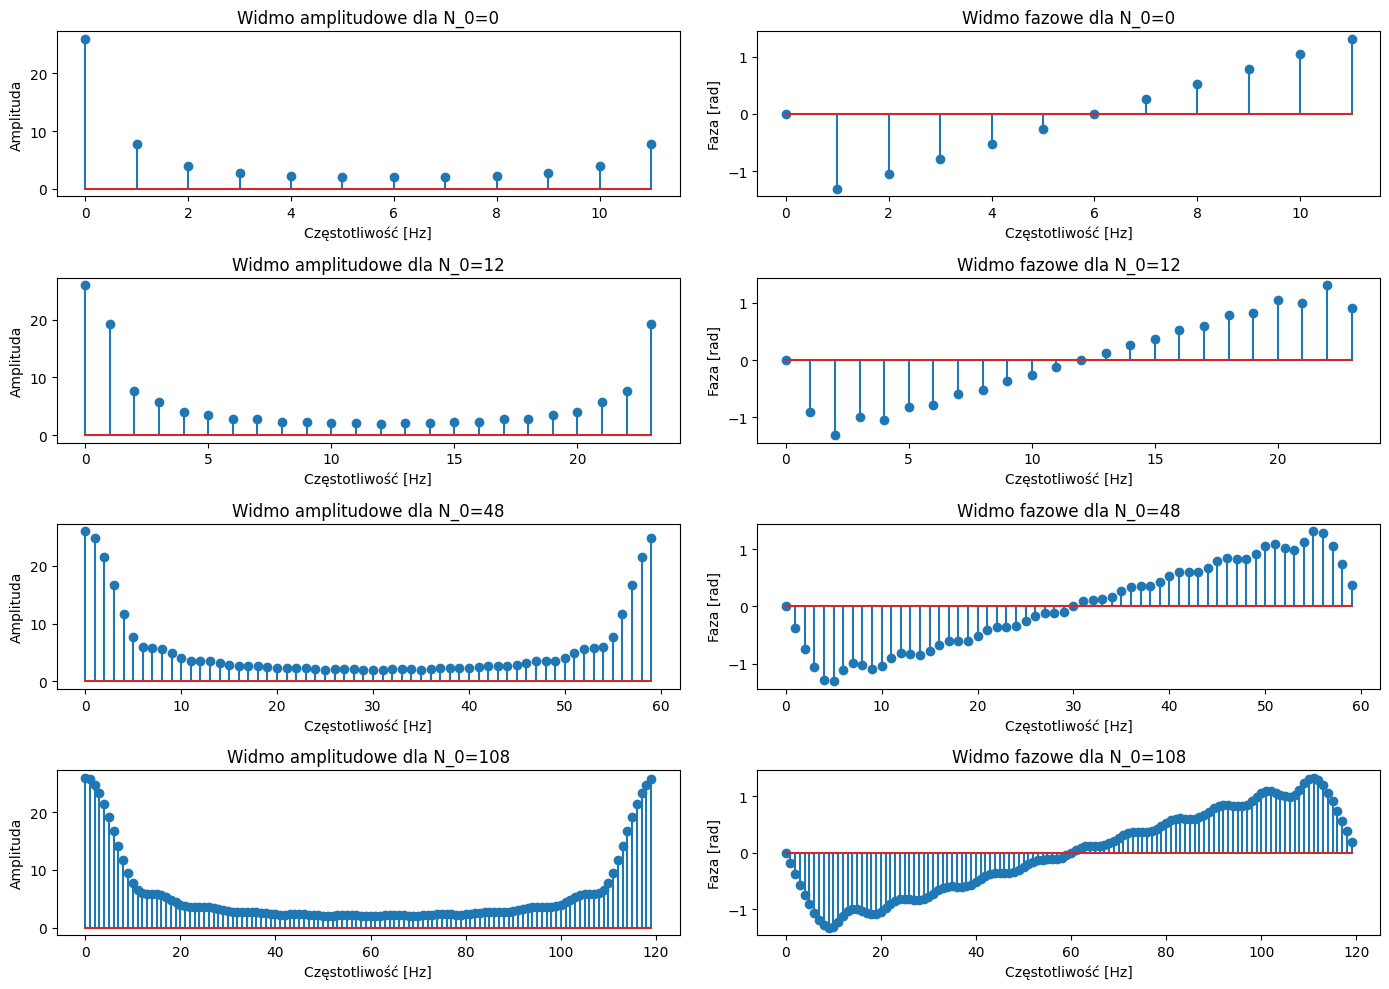

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry sygnału
A = 4
N = 12
n = np.arange(N)

# Tworzenie sygnału
s = A * (1 - (n % N) / N)

# Wartości dopełnienia zerami
zero_paddings = [0, 1*N, 4*N, 9*N]

# Rysowanie wykresów widma amplitudowego i fazowego dla różnych dopełnień zerami
fig, axs = plt.subplots(len(zero_paddings), 2, figsize=(14, 10))

for i, N_0 in enumerate(zero_paddings):
    # Dopełnienie zerami
    padded_signal = np.concatenate((s, np.zeros(N_0)))

    # FFT sygnału dopełnionego zerami
    S = np.fft.fft(padded_signal)

    # Widmo amplitudowe
    amplitude_spectrum = np.abs(S)
    # Widmo fazowe
    phase_spectrum = np.angle(S)

    # Wykres widma amplitudowego
    axs[i, 0].stem(amplitude_spectrum, use_line_collection=True)
    axs[i, 0].set_title(f'Widmo amplitudowe dla N_0={N_0}')
    axs[i, 0].set_xlabel('Częstotliwość [Hz]')
    axs[i, 0].set_ylabel('Amplituda')

    # Wykres widma fazowego
    axs[i, 1].stem(phase_spectrum, use_line_collection=True)
    axs[i, 1].set_title(f'Widmo fazowe dla N_0={N_0}')
    axs[i, 1].set_xlabel('Częstotliwość [Hz]')
    axs[i, 1].set_ylabel('Faza [rad]')

# Dostosowanie układu wykresów
plt.tight_layout()
plt.show()


Dopełnienie zerami ma wyraźny wpływ na oba widma sygnału – amplitudowe i fazowe. Zwiększając liczbę dopisanych zer, widzimy następujące efekty:

Widmo amplitudowe:
-  Bez dopełnienia ($ N_0 = 0 $): Widmo składa się z kilku pików, co odzwierciedla podstawowe składowe sygnału.
- $ N_0 = 12$: Rozdzielczość widma wzrasta – pojawiają się dodatkowe mniejsze piki między głównymi pikami sygnału.
- $ N_0 = 48$: Jeszcze większa liczba pików pojawia się w widmie, co pokazuje jeszcze większe detale sygnału.
- $ N_0 = 108$: Widmo staje się gęste z wieloma blisko położonymi pikami, co umożliwia bardzo szczegółową analizę częstotliwości sygnału.

Widmo fazowe:

-  Bez dopełnienia ($ N_0 = 0 $): Pokazuje proste przesunięcia fazowe dla kilku harmonicznych sygnału.
-  $ N_0 = 12 $: Fazowe charakterystyki stają się bardziej zauważalne, lecz nadal stosunkowo proste.
- $ N_0 = 48 $: Pojawia się wyraźny wzór przesunięć fazowych, które teraz są bardziej złożone.
- $ N_0 = 108 $: Widmo fazowe jest bardzo szczegółowe i pokazuje złożone zależności fazowe między poszczególnymi składowymi.

Podsumowując, zwiększenie $ N_0 $ prowadzi do większej szczegółowości w obu widmach. W amplitudowym lepiej widać składowe harmoniczne sygnału, co pozwala na dokładniejszą analizę częstotliwościową. W fazowym widoczne są złożone przesunięcia fazowe, które stają się bardziej widoczne i szczegółowe przy większym $ N_0 $. Nie obserwuje się zmiany pozycji pików w widmie amplitudowym, ale widoczne są zmiany w kształcie i dokładności widma fazowego.

## Zadanie 4:
Dany jest sygnał rzeczywisty $ s(t) = A_1 \sin(2\pi f_1 t) + A_2 \sin(2\pi f_2 t) + A_3 \sin(2\pi f_3 t) $,

gdzie:

$ A_1 = 0.1 $,

$ f_1 = 3000 \, \text{Hz} $,

$ A_2 = 0.7 $,

$ f_2 = 8000 \, \text{Hz} $,

$ A_3 = 0.9 $,

$ f_3 = 11000 \, \text{Hz} $.
  
 Przy założeniu, że częstotliwość próbkowania wynosi $ f_s = 48000 \, \text{Hz} $ i liczba próbek sygnału wynosi $ N_1 = 2048 $, przedstawić wykres widmowej gęstości mocy sygnału $ s(t) $. Czy dla podanej liczby próbek mamy do czynienia ze zjawiskiem przecieku widma? Czy sytuacja ulegałaby zmianie dla liczby próbek $ N_2 = \frac{3}{2} N_1 $? Odpowiedź uzasadnić.

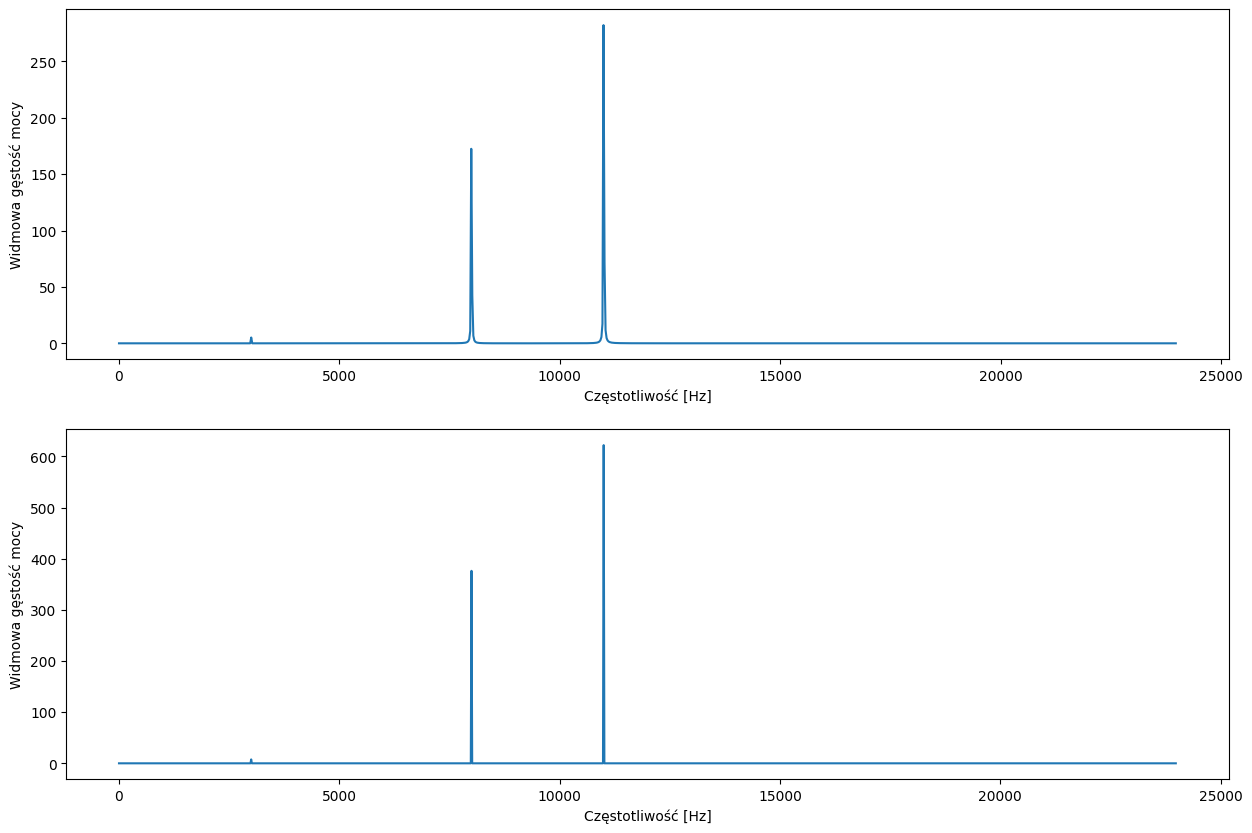

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# Dane wejściowe
A1 = 0.1
f1 = 3000
A2 = 0.7
f2 = 8000
A3 = 0.9
f3 = 11000
fs = 48000
N1 = 2048
N2 = int(3/2*N1)
# Generowanie sygnału s(t)
t = np.arange(N1) / fs
s = A1*np.sin(2*np.pi*f1*t) + A2*np.sin(2*np.pi*f2*t) + A3*np.sin(2*np.pi*f3*t)
# FFT sygnału s(t)
S = np.fft.fft(s)
# Wykres widmowej gęstości mocy
freq = np.fft.fftfreq(N1, 1/fs)
P = np.abs(S)**2 / N1
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
fig.subplots_adjust(hspace=0.2)
ax[0].plot(freq[:N1//2], P[:N1//2])
ax[0].set_xlabel('Częstotliwość [Hz]')
ax[0].set_ylabel('Widmowa gęstość mocy')
t = np.arange(N2) / fs
s = A1*np.sin(2*np.pi*f1*t) + A2*np.sin(2*np.pi*f2*t) + A3*np.sin(2*np.pi*f3*t)
# FFT sygnału s(t)
S = np.fft.fft(s)
# Wykres widmowej gęstości mocy
freq = np.fft.fftfreq(N2, 1/fs)
P = np.abs(S)**2 / N2
ax[1].plot(freq[:N2//2], P[:N2//2])
ax[1].set_xlabel('Częstotliwość [Hz]')
ax[1].set_ylabel('Widmowa gęstość mocy')
plt.show()


Na podstawie przedstawionego wykresu i rozwiązania można wyciągnąć wnioski dotyczące analizy widmowej gęstości mocy sygnału oraz wpływu liczby próbek na zjawisko przecieku widma.

Dla $ N_1 = 2048 $, na pierwszym wykresie widzimy trzy wyraźne piki, które odpowiadają częstotliwościom $ f_1 $, $ f_2 $ i  $ f_3 $. Widmowa gęstość mocy dla każdej z tych częstotliwości jest wyraźnie zaznaczona i nie zachodzi na siebie, co oznacza, że można je bez trudności zidentyfikować. Jednak wokół tych pików widoczne są niewielkie inne piki, co wskazuje na zjawisko przecieku widma. Jest to zjawisko spowodowane niecałkowitym dopasowaniem liczby próbek do okresów sygnału, co powoduje, że energia sygnału „rozlewa się” na pobliskie częstotliwości.

W sytuacji drugiego wykresu, dla $ N_2 = \frac{3}{2} N_1  $, czyli dla większej liczby próbek, rozdzielczość częstotliwościowa wzrasta. Widać to jako zwiększenie widmowej gęstości mocy przy tych samych częstotliwościach co poprzednio. Piki są bardziej skoncentrowane i nie występuje zauważalne przeciekanie energii na sąsiednie częstotliwości. Wynika to z tego, że zwiększenie liczby próbek poprawia rozdzielczość częstotliwościową w transformacie Fouriera, umożliwiając lepsze dopasowanie do składowych sygnału.

Podsumowując, na obu wykresach udało się zidentyfikować trzy składowe sygnału na odpowiednich częstotliwościach. Przeciek widma jest widoczny dla mniejszej liczby próbek $ N_1 $, a zwiększenie liczby próbek do $ N_2 $ zmniejsza ten efekt, poprawiając jakość wyników analizy częstotliwościowej sygnału.